In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn
import nltk
import os, sys
import random
import string
import email, re
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anurajmaurya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [156]:
Data= pd.read_csv("emails.csv",nrows=10000)

In [157]:
Data.shape

(10000, 2)

In [158]:
Data.describe()

,file,message
count,10000,10000
unique,10000,10000
top,arnold-j/deleted_items/294.,Message-ID: <29940720.1075861110029.JavaMail.e...
freq,1,1


In [159]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   file     10000 non-null  object
 1   message  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [160]:
emails = list(map(email.parser.Parser().parsestr,Data['message']))

In [161]:
heading = emails[0].keys()

In [162]:
print(heading)

['Message-ID', 'Date', 'From', 'To', 'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName']


In [163]:
for key in heading:
    Data[key]=[doc[key] for doc in emails]

In [164]:
Data["Content_Type"]=Data["Content-Type"]
Data.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Content_Type
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii


In [165]:
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)
Data['body'] = list(map(get_raw_text, emails))



In [166]:
Data.head()


,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Content_Type,body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii,Let's shoot for Tuesday at 11:45.


In [178]:
Data['user'] = Data['file'].map(lambda x: x.split('/')[0])
Data['N'] = Data['Date'].map(lambda x: x.split(' ')[1]+" "+x.split(' ')[2] + " " + x.split(' ')[3])
Data.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Content_Type,body,user,DATE,N
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Here is our forecast\n\n,allen-p,2001-05-14 16:39:00-07:00,14 May 2001
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Traveling to have a business meeting takes the...,allen-p,2001-05-04 13:51:00-07:00,4 May 2001
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii,test successful. way to go!!!,allen-p,2000-10-18 03:00:00-07:00,18 Oct 2000
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii,"Randy,\n\n Can you send me a schedule of the s...",allen-p,2000-10-23 06:13:00-07:00,23 Oct 2000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii,Let's shoot for Tuesday at 11:45.,allen-p,2000-08-31 05:07:00-07:00,31 Aug 2000


In [181]:
Data['Date'] = pd.to_datetime(Data['N'], infer_datetime_format=True)

In [185]:
Data.drop(["DATE","N"],axis=1)
Data.dtypes


file                                 object
message                              object
Message-ID                           object
Date                         datetime64[ns]
From                                 object
To                                   object
Subject                              object
Mime-Version                         object
Content-Type                         object
Content-Transfer-Encoding            object
X-From                               object
X-To                                 object
X-cc                                 object
X-bcc                                object
X-Folder                             object
X-Origin                             object
X-FileName                           object
Content_Type                         object
body                                 object
user                                 object
DATE                         datetime64[ns]
N                                    object
dtype: object

In [186]:
Data.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Content_Type,body,user,DATE,N
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14,phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Here is our forecast\n\n,allen-p,2001-05-14,14 May 2001
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04,phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Traveling to have a business meeting takes the...,allen-p,2001-05-04,4 May 2001
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii,test successful. way to go!!!,allen-p,2000-10-18,18 Oct 2000
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23,phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii,"Randy,\n\n Can you send me a schedule of the s...",allen-p,2000-10-23,23 Oct 2000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,text/plain; charset=us-ascii,Let's shoot for Tuesday at 11:45.,allen-p,2000-08-31,31 Aug 2000


In [194]:
Data['Month'] = Data['DATE'].dt.month
Data['Year'] = Data['DATE'].dt.year
Data['Day'] = Data['DATE'].dt.dayofweek
Data.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-Origin,X-FileName,Content_Type,body,user,DATE,N,Month,Year,Day
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14,phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Here is our forecast\n\n,allen-p,2001-05-14,14 May 2001,5,2001,0
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04,phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Traveling to have a business meeting takes the...,allen-p,2001-05-04,4 May 2001,5,2001,4
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen.nsf,text/plain; charset=us-ascii,test successful. way to go!!!,allen-p,2000-10-18,18 Oct 2000,10,2000,2
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23,phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen.nsf,text/plain; charset=us-ascii,"Randy,\n\n Can you send me a schedule of the s...",allen-p,2000-10-23,23 Oct 2000,10,2000,0
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen.nsf,text/plain; charset=us-ascii,Let's shoot for Tuesday at 11:45.,allen-p,2000-08-31,31 Aug 2000,8,2000,3


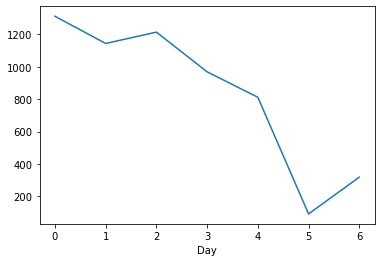

In [205]:

indices = (Data['Year'] > 2000) & (Data['Year'] <= 2004)
f=Data.loc[indices].groupby('Day')['body'].count().plot()

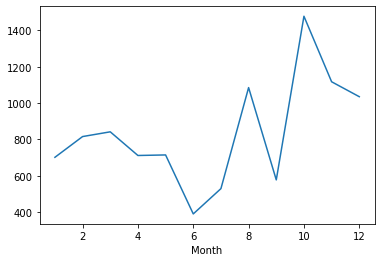

In [207]:
f2= Data.groupby('Month')['body'].count().plot()

In [208]:
print("No. of unique reciever", Data["To"].nunique())
print("No. of sender reciever", Data["From"].nunique())

No. of unique reciever 1334
No. of sender reciever 754


In [209]:
print("No. of mails",len(Data))

No. of mails 10000


In [215]:
Ten_most_frequent = Data.groupby("To")['body'].count().sort_values(ascending = False)[:20]

In [216]:
Ten_most_frequent

To
john.arnold@enron.com         425
ina.rangel@enron.com          372
harry.arora@enron.com         266
john.lavorato@enron.com       209
jennifer.fraser@enron.com     199
slafontaine@globalp.com       180
pallen@enron.com              179
20participants@caiso.com      165
stagecoachmama@hotmail.com    153
margaret.allen@enron.com      152
jsmith@austintx.com           146
jarnold@enron.com             138
mike.maggi@enron.com          137
pallen70@hotmail.com          119
susan.bailey@enron.com        119
epao@mba2002.hbs.edu          118
matthew.arnold@enron.com       98
keith.holst@enron.com          92
jenwhite7@zdnetonebox.com      88
k..allen@enron.com             84
Name: body, dtype: int64

In [217]:
Ten_most_frequent_Sender = Data.groupby("From")['body'].count().sort_values(ascending = False)[:20]

In [218]:
Ten_most_frequent_Sender

From
john.arnold@enron.com            3491
phillip.allen@enron.com          2125
k..allen@enron.com                297
robert.badeer@enron.com           193
susan.bailey@enron.com            143
harry.arora@enron.com              97
no.address@enron.com               92
arsystem@mailman.enron.com         90
sarah-joy.hunter@enron.com         74
eric.bass@enron.com                59
bwoertz@caiso.com                  57
crcommunications@caiso.com         57
jeff.youngflesh@enron.com          55
ina.rangel@enron.com               50
carla.hoffman@enron.com            48
enron.announcements@enron.com      48
cgrant@caiso.com                   45
soblander@carrfut.com              45
shapp@caiso.com                    42
office.chairman@enron.com          36
Name: body, dtype: int64

In [219]:
Data.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-Origin,X-FileName,Content_Type,body,user,DATE,N,Month,Year,Day
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14,phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Here is our forecast\n\n,allen-p,2001-05-14,14 May 2001,5,2001,0
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04,phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen (Non-Privileged).pst,text/plain; charset=us-ascii,Traveling to have a business meeting takes the...,allen-p,2001-05-04,4 May 2001,5,2001,4
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen.nsf,text/plain; charset=us-ascii,test successful. way to go!!!,allen-p,2000-10-18,18 Oct 2000,10,2000,2
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23,phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen.nsf,text/plain; charset=us-ascii,"Randy,\n\n Can you send me a schedule of the s...",allen-p,2000-10-23,23 Oct 2000,10,2000,0
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,Allen-P,pallen.nsf,text/plain; charset=us-ascii,Let's shoot for Tuesday at 11:45.,allen-p,2000-08-31,31 Aug 2000,8,2000,3


In [220]:
def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html 
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        
        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'


Data['SUBJECT'] = Data['Subject'].apply(clean_column)
Data['BODY'] = Data['body'].apply(clean_column)

In [221]:
Data.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,Content_Type,body,user,DATE,N,Month,Year,Day,SUBJECT,BODY
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14,phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,text/plain; charset=us-ascii,Here is our forecast\n\n,allen-p,2001-05-14,14 May 2001,5,2001,0,,here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04,phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,text/plain; charset=us-ascii,Traveling to have a business meeting takes the...,allen-p,2001-05-04,4 May 2001,5,2001,4,,traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,text/plain; charset=us-ascii,test successful. way to go!!!,allen-p,2000-10-18,18 Oct 2000,10,2000,2,test,test successful way to go
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23,phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,text/plain; charset=us-ascii,"Randy,\n\n Can you send me a schedule of the s...",allen-p,2000-10-23,23 Oct 2000,10,2000,0,,randy can you send me a schedule of the sala...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,text/plain; charset=us-ascii,Let's shoot for Tuesday at 11:45.,allen-p,2000-08-31,31 Aug 2000,8,2000,3,hello,lets shoot for tuesday at


In [228]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [227]:
to_add = ['FW', 'ga', 'httpitcappscorpenroncomsrrsauthemaillinkaspidpage', 'cc', 'aa', 'aaa', 'aaaa',
         'hou', 'cc', 'etc', 'subject', 'pm']
stop_words = set(stopwords.words('english'))
for i in to_add:
    stop_words.add(i)

In [236]:
stemmer = PorterStemmer()
def stemming(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    print(words)
    words = [stemmer.stem(word) for word in words]
    print(words)
    return words
a="I am a going in go studied study person 3 4 4 & &321 "
A=stemming(a)

['i', 'am', 'a', 'going', 'in', 'go', 'studied', 'study', 'person', '3', '4', '4', '321']
['i', 'am', 'a', 'go', 'in', 'go', 'studi', 'studi', 'person', '3', '4', '4', '321']


In [237]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    print(tokens)
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    print(filtered_tokens)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    print(stems)
    return stems

a="I am a going in go studied study person 3 4 4 & &321 "
A=tokenize_and_stem(a)

['I', 'am', 'a', 'going', 'in', 'go', 'studied', 'study', 'person', '3', '4', '4', '&', '&', '321']
['I', 'am', 'a', 'going', 'in', 'go', 'studied', 'study', 'person']
['I', 'am', 'a', 'go', 'in', 'go', 'studi', 'studi', 'person']


In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer
d = Data["BODY"]
tf_idf_vectorizer = TfidfVectorizer(stop_words= stop_words, max_features=5000)
tf_idf = tf_idf_vectorizer.fit_transform(d)
tf_idf = normalize(tf_idf)
tf_idf_array = tf_idf.toarray()
k = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizer.get_feature_names())

/Users/anurajmaurya/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['fw'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [243]:
k.shape
k.head()

,ab,ability,able,abn,abramo,absence,absolutely,abu,ac,accelerate,...,yy,zd,zdnet,zerilli,zero,zimmerman,zinfandel,zip,zipper,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
class Kmeans:
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
    def initialise_centroid(self,data):
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    def assign_cluster(self,data):
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    def update_centroid(self,data):
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    def predict (self , data):
        return self.assign_cluster(data)
    def fit_means(self,data):
        self.centroids = self.initialise_centroid(data)
        
        
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_cluster(data)
            self.centroids = self.update_centroid(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self

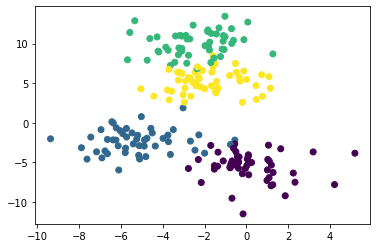

In [284]:
from sklearn.datasets import make_blobs
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
plt.scatter(data[0][:,0], data[0][:,1], c=data[1])

In [285]:
temp_k = Kmeans(4,1,600)
temp_fit = temp_k.fit_means(data[0]) 

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


In [299]:
pca=PCA(n_components=2)
Yy=pca.fit_transform(tf_idf_array)
test= Kmeans(4,1,600)

In [300]:
fit= test.fit_means(Yy)
predict= test.predict(Yy)

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


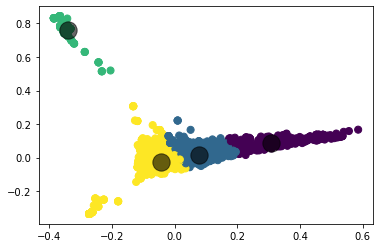

In [301]:
plt.scatter(Yy[:, 0], Yy[:, 1], c=predict, s=50, cmap='viridis')

centers = fit.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)

In [303]:
from sklearn.cluster import KMeans

/Users/anurajmaurya/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass init=600 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


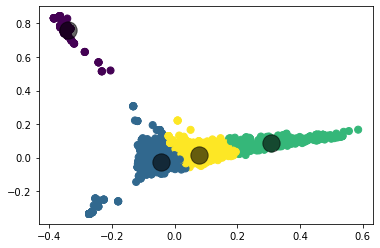

In [304]:
kmeans = KMeans(4,600)
fit= test.fit_means(Yy)
predict= test.predict(Yy)
plt.scatter(Yy[:, 0], Yy[:, 1], c=predict, s=50, cmap='viridis')

centers = fit.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)

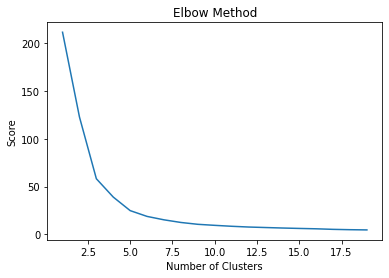

In [307]:
#optimal cluster

no_cluster = range(1,20)
kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in no_cluster]


score = [kmeans[i].fit(Yy).score(Yy) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(no_cluster, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()